# Pymaceuticals Inc.
---

### Analysis

• After reviewing the charts and graphs created I would infer that Capomulin presented promising results.  For example on mouse B128, as time progressed the tumor decreased in size.
• Another observation was that it appears that the more the mice weighed the larger the tumor volume.  This could lead to maybe some questioning regarding the diets of each mouse.
• The female and male count was pretty even so I would say that this would not bias the results one way or another.
• In summary Capomulin and Ramicane presented the best results in terms of decrease of tumor volume.
 

In [206]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
combined_mouse_study_df = pd.merge(study_results, mouse_metadata, how='left', on="Mouse ID")

# Display the data table for preview
combined_mouse_study_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [207]:
# Checking the number of mice.
len(combined_mouse_study_df["Mouse ID"].unique())


249

In [208]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

duplicate_mouse_ids = combined_mouse_study_df.loc[combined_mouse_study_df.duplicated(subset=['Mouse ID', 'Timepoint']),'Mouse ID'].unique()

duplicate_mouse_ids



array(['g989'], dtype=object)

In [209]:
# Optional: Get all the data for the duplicate mouse ID. 
searched_df = combined_mouse_study_df.loc[combined_mouse_study_df["Mouse ID"] == "g989",:]

searched_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [210]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_study_data_complete = combined_mouse_study_df[combined_mouse_study_df['Mouse ID'].isin(duplicate_mouse_ids)==False]
clean_study_data_complete.head(20)

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25
5,h246,0,45.0,0,Ketapril,Male,13,30
6,p189,0,45.0,0,Ketapril,Male,8,28
7,n923,0,45.0,0,Ketapril,Male,19,30
8,q119,0,45.0,0,Ketapril,Male,17,30
9,f993,0,45.0,0,Naftisol,Male,21,28


In [211]:
# Checking the number of mice in the clean DataFrame.
len(clean_study_data_complete["Mouse ID"].unique())

248

## Summary Statistics

In [213]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

grouped_df = clean_study_data_complete.groupby('Drug Regimen')
                                               
tumor_mean = grouped_df['Tumor Volume (mm3)'].mean()
tumor_median = grouped_df['Tumor Volume (mm3)'].median()
tumor_variance = grouped_df['Tumor Volume (mm3)'].var()
tumor_std = grouped_df['Tumor Volume (mm3)'].std()
tumor_sem = grouped_df['Tumor Volume (mm3)'].sem()

summary_df = pd.DataFrame({"Mean Tumor Volume": tumor_mean,
                            "Median Tumor Volume": tumor_median,
                            "Tumor Volume Variance": tumor_variance,
                            "Tumor Volume Std.Dev.": tumor_std,
                            "Tumor Volume Std.Err.": tumor_sem})

summary_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std.Dev.,Tumor Volume Std.Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [214]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line


## Bar and Pie Charts

In [215]:
#created a new dataframe to create the Bar Charts.

count_timepoint = grouped_df['Timepoint'].count()
bar_df = pd.DataFrame({"Timepoints": count_timepoint}).sort_values(by="Timepoints", ascending = False)
bar_df

,Timepoints
Drug Regimen,
Capomulin,230
Ramicane,228
Ketapril,188
Naftisol,186
Zoniferol,182
Placebo,181
Stelasyn,181
Ceftamin,178
Infubinol,178


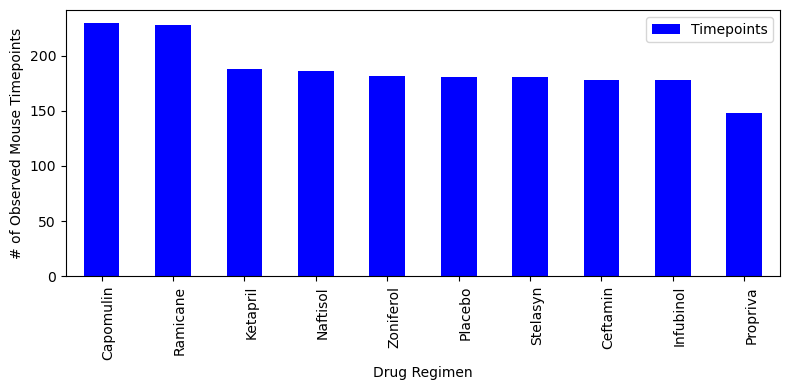

In [216]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
#clean_study_data_complete.head()

figure1 = bar_df.plot(kind="bar", color="blue", figsize=(8,4),
                            
                                   xlabel="Drug Regimen",
                                   ylabel="# of Observed Mouse Timepoints")

# Configure x-tick rotation
xticklabels = bar_df.index
figure1.set_xticklabels(xticklabels, rotation_mode="anchor", ha="right", wrap=True)

plt.tight_layout()
# Show plot
plt.show()


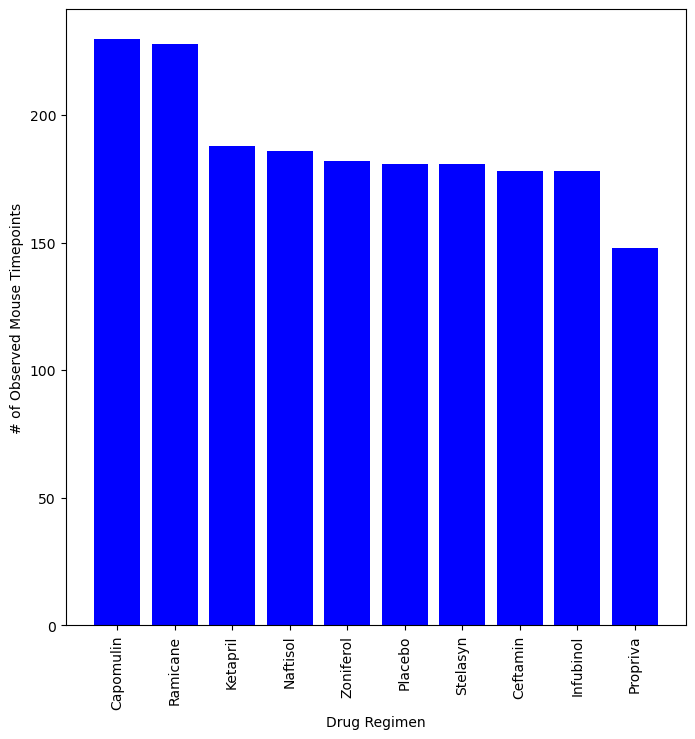

In [217]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
x_axis = np.arange(len(bar_df))
tick_locations = [value for value in x_axis]

plt.figure(figsize=(8,8))
plt.bar(x_axis, bar_df["Timepoints"], color='b', alpha=1, align="center")
plt.xticks(tick_locations, bar_df.index, rotation="vertical")

plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.show()

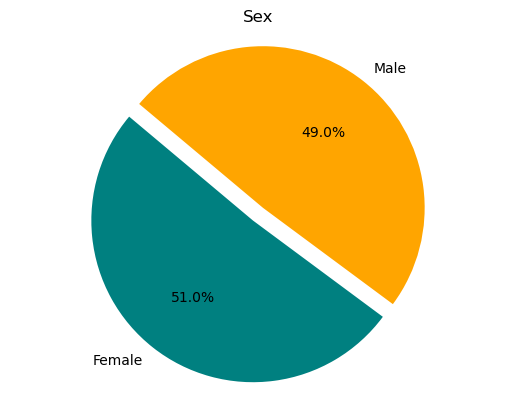

In [218]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas


labels = clean_study_data_complete['Sex'].unique()
sizes = clean_study_data_complete['Sex'].value_counts()

colors = ["teal", "orange"]
explode = [0.1, 0]

plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", startangle=140)

plt.axis("equal")  
plt.title("Sex")      
plt.show()




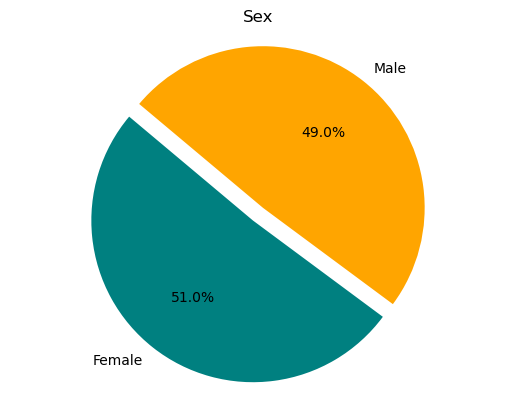

In [219]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = ["Female", "Male"]
sizes = [958, 922]
colors = ["teal", "orange"]
explode = [0.1, 0]

plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", startangle=140)

plt.axis("equal")  
plt.title("Sex")      
plt.show()



## Quartiles, Outliers and Boxplots

In [220]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse

last_timepoint_df = clean_study_data_complete.groupby('Mouse ID')['Timepoint'].max()



# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
timepoint_merged_df = pd.merge(last_timepoint_df, clean_study_data_complete, on=['Mouse ID', 'Timepoint'], how="left")

timepoint_merged_df.head(20)


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29
5,a401,45,66.794156,4,Zoniferol,Female,8,25
6,a411,45,38.407618,1,Ramicane,Male,3,22
7,a444,45,43.047543,0,Ramicane,Female,10,25
8,a457,10,49.783419,0,Ketapril,Female,11,30
9,a492,45,60.122011,1,Stelasyn,Male,20,25


In [221]:
# Put treatments into a list for for loop (and later for plot labels)
# Create empty list to fill with tumor vol data (for plotting)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
tumor_vol_data = []
    
# Locate the rows which contain mice on each drug and get the tumor volumes
# add subset 
# Calculate the IQR and quantitatively determine if there are any potential outliers. 

for treatment in treatments: 
                tumor_vol_fin = timepoint_merged_df[timepoint_merged_df["Drug Regimen"] == treatment]['Tumor Volume (mm3)']
                tumor_vol_data.append(tumor_vol_fin)
                quartiles = tumor_vol_fin.quantile([.25,.5,.75])
                lowerq = quartiles[0.25]
                upperq = quartiles[0.75]
                iqr = upperq-lowerq
                lower_bound = lowerq - (1.5*iqr)
                upper_bound = upperq + (1.5*iqr)

            
                



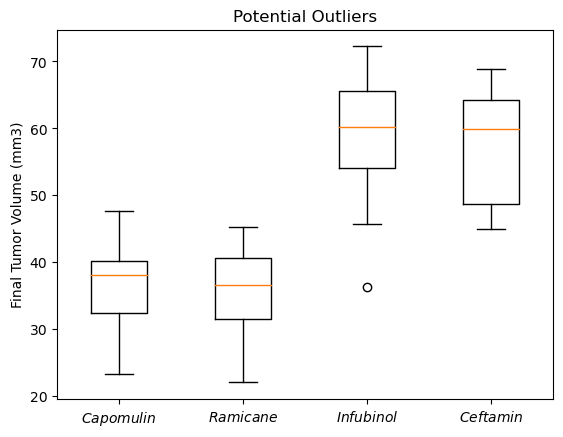

In [222]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.

fig1, ax1 = plt.subplots()
ax1.set_title('Potential Outliers')
ax1.set_ylabel('Final Tumor Volume (mm3)')
ax1.boxplot(tumor_vol_data)
ax1.set_xticklabels(('$Capomulin$', '$Ramicane$', '$Infubinol$', '$Ceftamin$'))
ax1.set_facecolors="red"
plt.show()

## Line and Scatter Plots

Text(0, 0.5, 'Tumor Volume (mm3)')

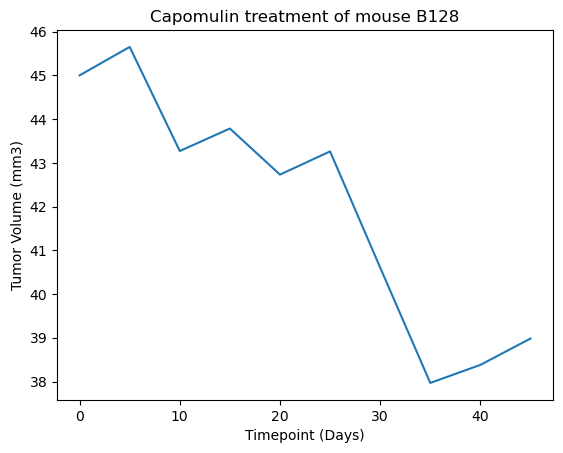

In [223]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin

line_plot_df = clean_study_data_complete.loc[clean_study_data_complete["Mouse ID"] == "b128", ["Timepoint", "Tumor Volume (mm3)"]]

line_plot_clean_df = line_plot_df.reset_index(drop=True)

plt.plot(line_plot_clean_df["Timepoint"], line_plot_clean_df["Tumor Volume (mm3)"])

# Add titles
plt.title("Capomulin treatment of mouse B128")
plt.xlabel("Timepoint (Days)")
plt.ylabel("Tumor Volume (mm3)")




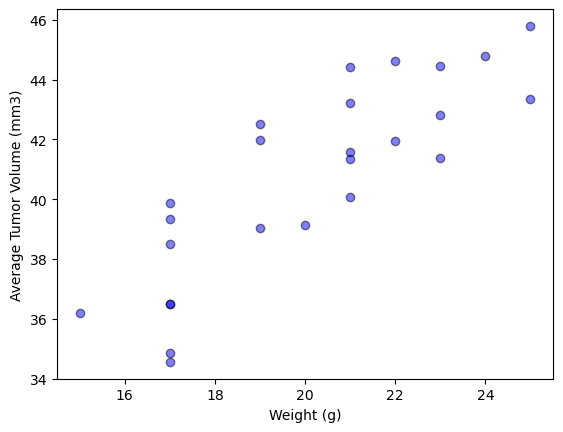

In [224]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen

only_capomulin_df = clean_study_data_complete[clean_study_data_complete["Drug Regimen"] == 'Capomulin']

scatter_plot_df = only_capomulin_df.groupby(["Mouse ID"])
mean_tumor_volume = scatter_plot_df["Tumor Volume (mm3)"].mean()
weight = scatter_plot_df["Weight (g)"].mean()

plt.scatter(weight, mean_tumor_volume, marker="o", facecolors="blue", edgecolors="black",
             alpha=0.5)

# Add titles
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()


## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


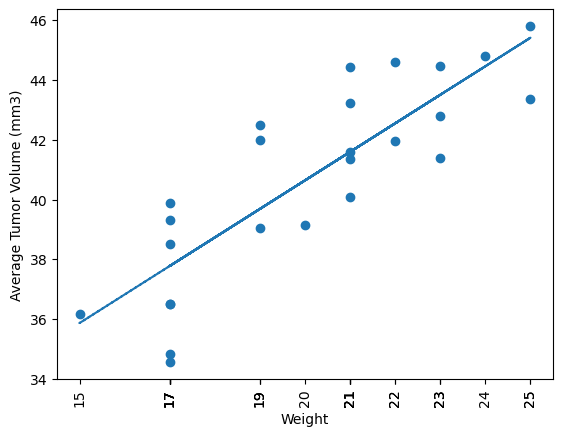

In [225]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

# Calculate correlation
from scipy import stats

correlation = st.pearsonr(weight,mean_tumor_volume)
print(f"The correlation between mouse weight and the average tumor volume is {round(correlation[0],2)}")

#Linear Regression

pe_slope, pe_int, pe_r, pe_p, pe_std_err = stats.linregress(weight, mean_tumor_volume)
pe_fit = pe_slope * weight + pe_int

plt.scatter(weight,mean_tumor_volume)
plt.plot(weight,pe_fit,"--")
plt.xticks(weight, rotation=90)
plt.xlabel('Weight')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()

